<a href="https://colab.research.google.com/github/Nimrat4/Adversarial-attacks-and-CNN-MODEL/blob/main/adversarial_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 102s 49ms/step - accuracy: 0.8885 - loss: 0.3533 - val_accuracy: 0.9816 - val_loss: 0.0527
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 37ms/step - accuracy: 0.9833 - loss: 0.0539 - val_accuracy: 0.9868 - val_loss: 0.0381
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9899 - loss: 0.0329 - val_accuracy: 0.9877 - val_loss: 0.0338
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9924 - loss: 0.0244 - val_accuracy: 0.9889 - val_loss: 0.0368
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9932 - loss: 0.0199 - val_accuracy: 0.9889 - val_loss: 0.0404
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9859 - loss: 0.0511
Test loss on original examples: 0.04042983800172806
Test accuracy on original examples: 0.9889000058174133
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8248 - loss: 0.6067
Test loss on adversarial examples: 0.6900361776351929
Test accuracy on adversarial exa

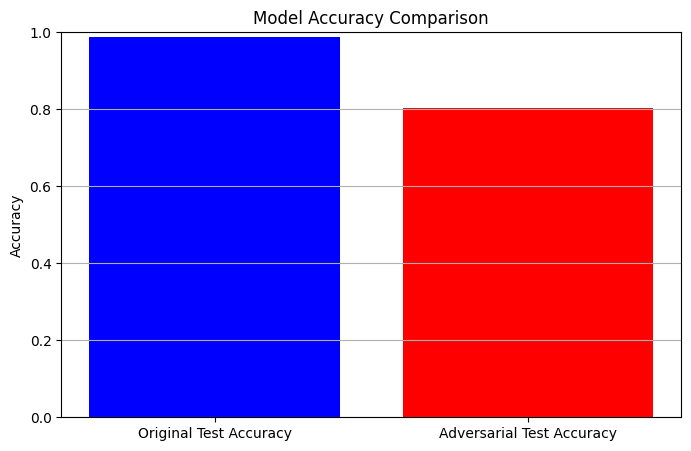

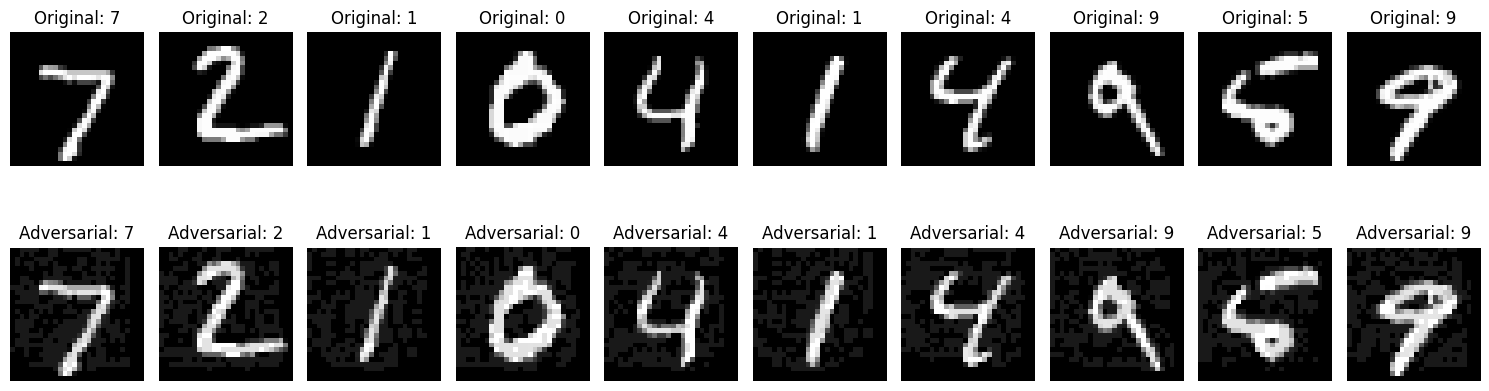

Epoch 1/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.9018 - loss: 0.3156 - val_accuracy: 0.9849 - val_loss: 0.0467
Epoch 2/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9849 - loss: 0.0503 - val_accuracy: 0.9843 - val_loss: 0.0458
Epoch 3/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - accuracy: 0.9897 - loss: 0.0310 - val_accuracy: 0.9902 - val_loss: 0.0287
Epoch 4/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9914 - val_loss: 0.0281
Epoch 5/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.9937 - loss: 0.0191 - val_accuracy: 0.9912 - val_loss: 0.0293
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9885 - loss: 0.0394
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9831 - loss: 0.0383

Adversarially Trained Model Performance:
Original Test Accuracy: 0.9912
Adversarial Test Accuracy: 0.9790


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Task 1: Load the MNIST dataset and preprocess the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocessing the data: reshape and normalize
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Building the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

# Task 3: Evaluate the model on original test data
original_test_loss, original_test_acc = model.evaluate(test_images, test_labels)
print(f"Test loss on original examples: {original_test_loss}")
print(f"Test accuracy on original examples: {original_test_acc}")

# Function to create adversarial examples using FGSM
def create_adversarial_pattern(images, labels):
    images = tf.convert_to_tensor(images)
    labels = tf.convert_to_tensor(labels)

    with tf.GradientTape() as tape:
        tape.watch(images)
        predictions = model(images)
        loss = tf.keras.losses.sparse_categorical_crossentropy(labels, predictions)

    # Get the gradients of the loss w.r.t to the input image
    gradient = tape.gradient(loss, images)
    signed_grad = tf.sign(gradient)  # Get the sign of the gradients
    return signed_grad

# Create adversarial examples
def create_adversarial_examples(images, labels, eps=0.1):
    perturbations = create_adversarial_pattern(images, labels)
    adversarial_images = images + eps * perturbations
    adversarial_images = tf.clip_by_value(adversarial_images, 0, 1)  # Keep pixel values between 0 and 1
    return adversarial_images

# Generate adversarial examples for a smaller subset of the test set
subset_size = 1000  # Use only 1000 images for adversarial example generation
adversarial_test_images = create_adversarial_examples(test_images[:subset_size], test_labels[:subset_size])

# Evaluate the model on adversarial examples
adversarial_test_loss, adversarial_test_acc = model.evaluate(adversarial_test_images, test_labels[:subset_size])
print(f"Test loss on adversarial examples: {adversarial_test_loss}")
print(f"Test accuracy on adversarial examples: {adversarial_test_acc}")

# Summarize the performance
print("\nModel Performance Summary:")
print(f"Original Test Accuracy: {original_test_acc:.4f}")
print(f"Adversarial Test Accuracy: {adversarial_test_acc:.4f}")
print(f"Accuracy Drop: {original_test_acc - adversarial_test_acc:.4f}")

# Plotting the accuracy comparison
accuracies = [original_test_acc, adversarial_test_acc]
labels = ['Original Test Accuracy', 'Adversarial Test Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'red'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y')
plt.show()

# Plot original and adversarial images
def plot_examples(original_images, adversarial_images, labels, num_examples=10):
    plt.figure(figsize=(15, 5))

    for i in range(num_examples):
        # Plot original images
        plt.subplot(2, num_examples, i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Original: {labels[i]}")
        plt.axis('off')

        # Plot adversarial images
        plt.subplot(2, num_examples, i + 1 + num_examples)
        plt.imshow(adversarial_images[i].numpy().reshape(28, 28), cmap='gray')
        plt.title(f"Adversarial: {labels[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the plot function for the first 10 examples
plot_examples(test_images, adversarial_test_images, test_labels[:10])

# Task 4: Adversarial Training
# Generate adversarial examples for the training data
adversarial_train_images = create_adversarial_examples(train_images[:10000], train_labels[:10000])

# Combine original and adversarial training data
combined_train_images = np.concatenate((train_images, adversarial_train_images))
combined_train_labels = np.concatenate((train_labels, train_labels[:10000]))  # Using the same labels

# Rebuild the model for adversarial training
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model again
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with adversarial examples
history_adversarial = model.fit(combined_train_images, combined_train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate the adversarially trained model on original and adversarial test data
original_test_loss_adv, original_test_acc_adv = model.evaluate(test_images, test_labels)
adversarial_test_loss_adv, adversarial_test_acc_adv = model.evaluate(adversarial_test_images, test_labels[:subset_size])

# Print results for adversarially trained model
print(f"\nAdversarially Trained Model Performance:")
print(f"Original Test Accuracy: {original_test_acc_adv:.4f}")
print(f"Adversarial Test Accuracy: {adversarial_test_acc_adv:.4f}")
